In [216]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from xgboost import XGBRegressor
from sklearn import metrics


In [218]:
df = pd.read_csv('surveyofbodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# EDA

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [93]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


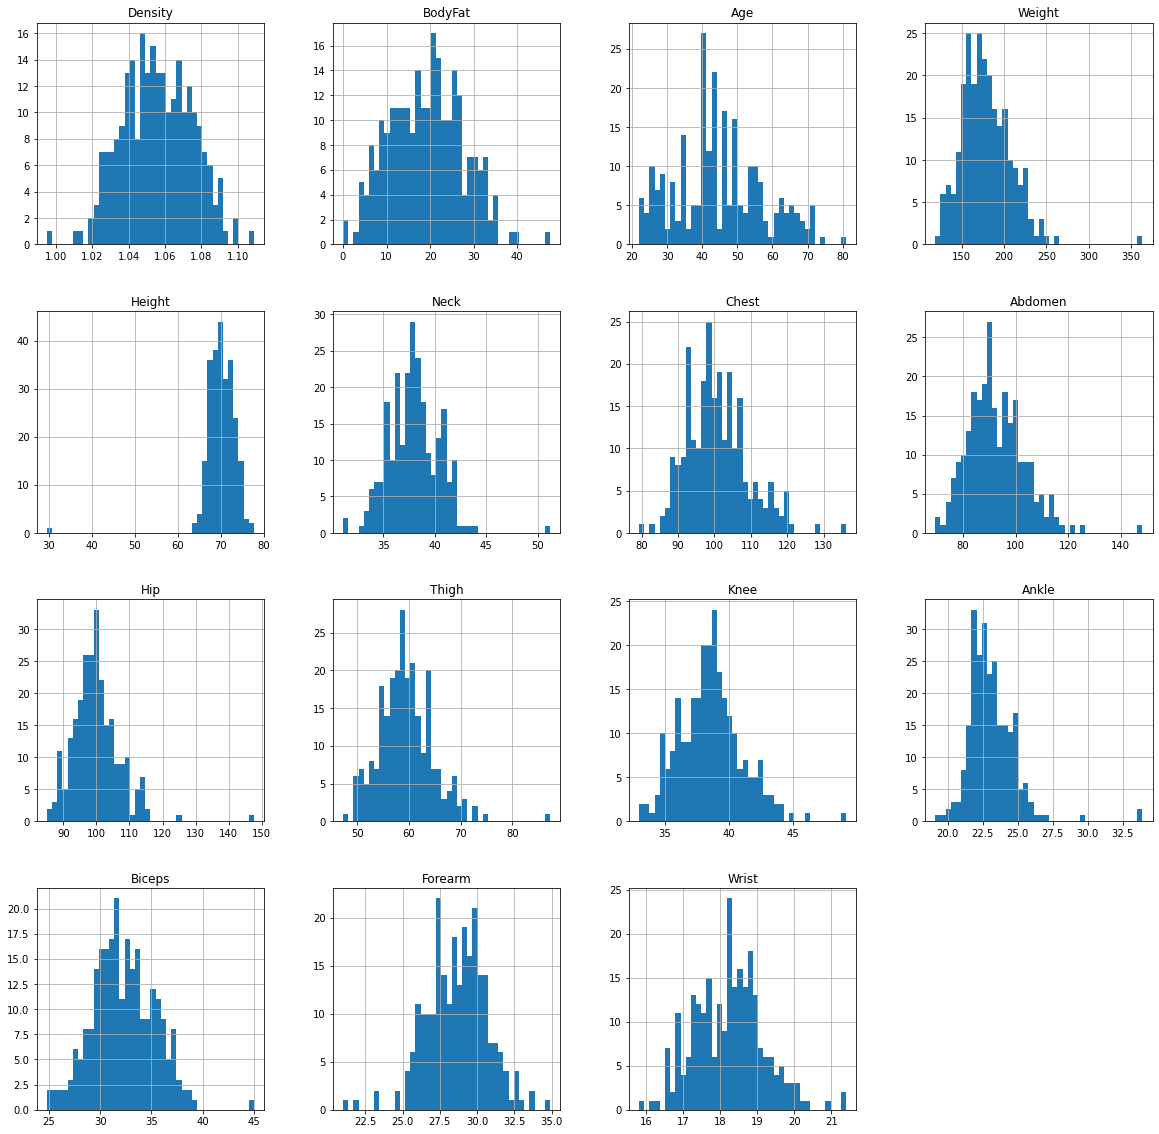

In [236]:
df.hist(bins=40 , figsize=(20,20))
plt.show()

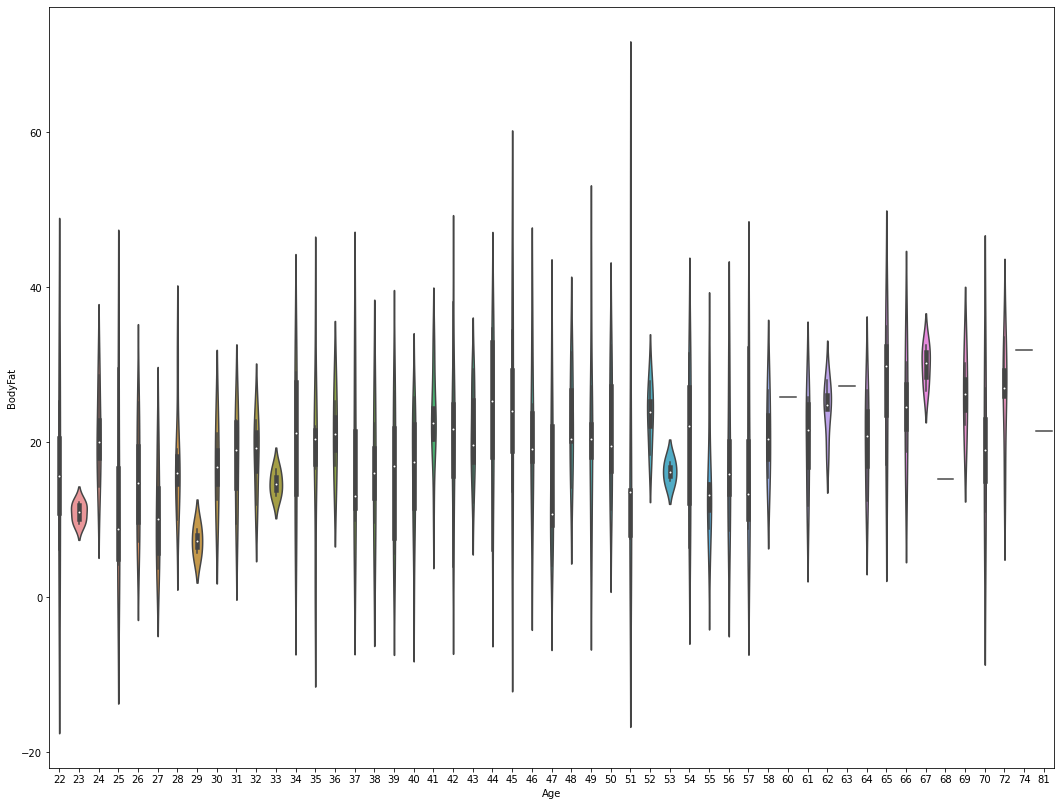

In [235]:
plt.figure(figsize=(18,14))
sns.violinplot(x='Age' , y = 'BodyFat' ,data=df)
plt.show()

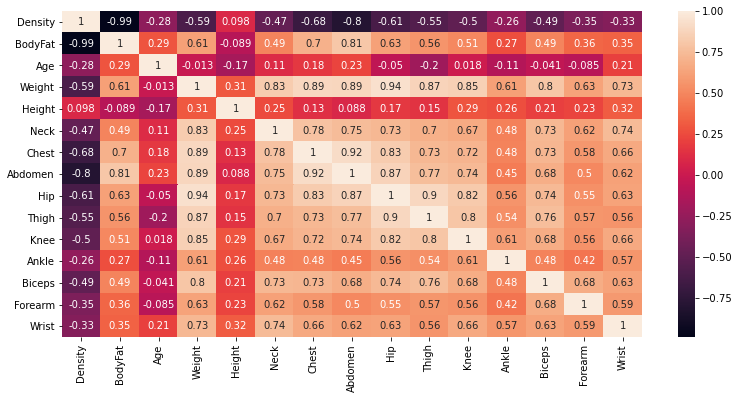

In [95]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

Train and test splitting

In [96]:
x = df.drop(['BodyFat'],1)
y= df.iloc[:,1]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

Scaling

In [98]:
sc = StandardScaler()
scale = sc.fit(x_train)  
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

PCA

In [99]:
pca = PCA(n_components = 0.97)
x_pca = pca.fit(x_train)
x_train = x_pca.transform(x_train)
x_test = x_pca.transform(x_test)

# Linear Regression

In [100]:
LR_model= LinearRegression()
scores = cross_val_score(estimator=LR_model, X=x_train, y=y_train, cv=10)
print('score:',scores.mean())
LR_model.fit(x_train,y_train)
print('coefficients:', LR_model.coef_)
print('intercept:', LR_model.intercept_)
y_pred_LR = LR_model.predict(x_test)


score: 0.9863397674502938
coefficients: [ 1.80932086  3.58660309  1.36582914  0.19396449 -2.1211146   3.95731745
  0.52939682 -0.50264434 -3.43499346 -2.9422921 ]
intercept: 19.12727272727273


In [101]:
LR_model.score(x_test,y_test)

0.9303227149954636

In [103]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

Mean Squared Error: 5.6244218599580105
Root Mean Squared Error: 2.37158635937172


# Ridge Regression

In [224]:
model = Ridge()
parameters = {'alpha':[30]}
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=10)
Ridge_reg.fit(x_train,y_train)
print(Ridge_reg.best_estimator_)
Ridge_model = Ridge_reg.best_estimator_
Ridge_model.fit(x_train,y_train)
y_pred_Ridge = Ridge_model.predict(x_test)

Ridge(alpha=30)


In [225]:
print('score of train:',Ridge_model.score(x_train,y_train), 'score of test:',Ridge_model.score(x_test,y_test))

score of train: 0.9635962435389169 score of test: 0.941376586096613


In [226]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)))

Mean Squared Error: 4.732142055220858
Root Mean Squared Error: 2.175348720371255


In [227]:
xgboost = XGBRegressor(learning_rate = 0.01,
 n_estimators=800,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.5,
 colsample_bytree=0.5, 
 )
xgboost.fit(x_train, y_train)
y_pred_xgboost = xgboost.predict(x_test)


In [228]:
print('score of train:',xgboost.score(x_train,y_train), 'score of test:',xgboost.score(x_test,y_test))

score of train: 0.9961368267691516 score of test: 0.8443680028821223


In [229]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))

Mean Squared Error: 12.562774319374297
Root Mean Squared Error: 3.544400417471804


In [230]:
models = ["LR_model", 
                "Ridge_model",
                'xgboost'] 

test_scores = [
               LR_model.score(x_test, y_test),
               Ridge_model.score(x_test,y_test),
               xgboost.score(x_test,y_test)
               ]
MSE = [metrics.mean_squared_error(y_test, y_pred_LR),
       metrics.mean_squared_error(y_test, y_pred_Ridge),
       metrics.mean_squared_error(y_test, y_pred_xgboost)]
    

RMSE = [np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))]        

            

In [231]:
data = {'Models':models,'Test score':test_scores,'MSE':MSE,'RMSE':RMSE,}

In [232]:
results = pd.DataFrame(data=data, index=[0, 1, 2])
results.sort_values(by = 'Test score', ascending = False)

,Models,Test score,MSE,RMSE
1,Ridge_model,0.941377,4.732142,2.175349
0,LR_model,0.930323,5.624422,2.371586
2,xgboost,0.844368,12.562774,3.544400
